In [3]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})


In [66]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    print('width of bins = %.3f'%width)
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        try:
            err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        except:
            # it can help when you look for the 99th percentile
            err_y_high[i]  = np.abs(temp_ord[-1]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [5]:
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)

Total number of measurements: 764
Measurements with 100 < PR < 160: 740 (97 %)
Measurenment with PR <= 100: 17 (2 %)
Measurenment with PR >= 160: 7 (1 %)


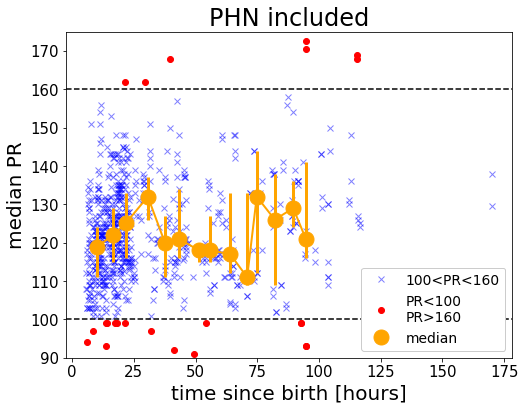

In [6]:
plt.figure(figsize=(8,6))

#v1 = T['DELTA_SEC_MEASURE'][T['PHN']==False]/60./60.
#v2 = T['MED_PR'][T['PHN']==False]
v1 = T['DELTA_SEC_MEASURE']/60./60.
v2 = T['MED_PR']

plt.plot(v1[(v2<160)&(v2>100)],v2[(v2<160)&(v2>100)],"xb",label='100<PR<160',alpha=0.5)
plt.plot(v1[(v2>=160)|(v2<=100)],v2[(v2>=160)|(v2<=100)],"or",label='PR<100\nPR>160')

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')


xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6.0,100,14)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median',zorder=11)
plt.plot(xx,yy,color="orange",lw=2)

print('Total number of measurements: %i'%len(v2))
print('Measurements with 100 < PR < 160: %i (%.0f %%)'%(len(v1[(v2<160)&(v2>100)]),len(v1[(v2<160)&(v2>100)])/len(v2)*100))
print('Measurenment with PR <= 100: %i (%.0f %%)'%(len(v2[v2<=100]),len(v2[v2<=100])/len(v2)*100))
print('Measurenment with PR >= 160: %i (%.0f %%)'%(len(v2[v2>=160]),len(v2[v2>=160])/len(v2)*100))



#plt.xlim(10,1000)
plt.ylim(90,175)
plt.xlabel('time since birth [hours]')
plt.ylabel('median PR')
plt.legend(loc=4,fontsize='x-small',framealpha=1,fancybox=True)
#plt.title('Heart rates in healthy babies')
plt.title('PHN included')
plt.show()

Total number of measurements: 572
Measurements with 100 < PR < 160: 559 (98 %)
Measurenment with PR <= 100: 10 (2 %)
Measurenment with PR >= 160: 3 (1 %)


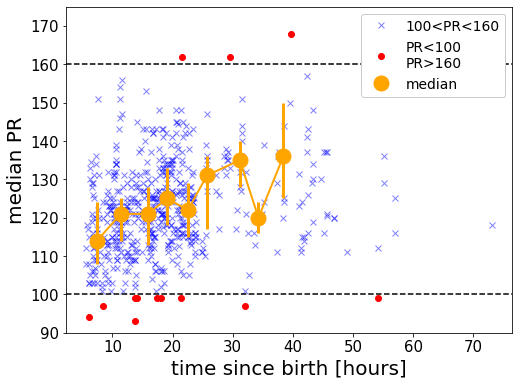

In [7]:
# NO PHN

plt.figure(figsize=(8,6))

v1 = T['DELTA_SEC_MEASURE'][T['PHN']==False]/60./60.
v2 = T['MED_PR'][T['PHN']==False]


plt.plot(v1[(v2<160)&(v2>100)],v2[(v2<160)&(v2>100)],"xb",label='100<PR<160',alpha=0.5)
plt.plot(v1[(v2>=160)|(v2<=100)],v2[(v2>=160)|(v2<=100)],"or",label='PR<100\nPR>160')

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')

print('Total number of measurements: %i'%len(v2))
print('Measurements with 100 < PR < 160: %i (%.0f %%)'%(len(v1[(v2<160)&(v2>100)]),len(v1[(v2<160)&(v2>100)])/len(v2)*100))
print('Measurenment with PR <= 100: %i (%.0f %%)'%(len(v2[v2<=100]),len(v2[v2<=100])/len(v2)*100))
print('Measurenment with PR >= 160: %i (%.0f %%)'%(len(v2[v2>=160]),len(v2[v2>=160])/len(v2)*100))

xx,yy,ey1,ey2 = median_in_bins_err(v1,v2,6.0,40,9)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median',zorder=11)
plt.plot(xx,yy,color="orange",lw=2)


#plt.xlim(10,1000)
plt.ylim(90,175)
plt.xlabel('time since birth [hours]')
plt.ylabel('median PR')
plt.legend(loc=1,fontsize='x-small',framealpha=1,fancybox=True)
#plt.title('Heart rates in healthy babies')
plt.show()

In [8]:
#pr,spo2,med_pr,med_spo2 = np.loadtxt('../TOST_data/total_datapoints.txt.txt',unpack=True)
pr, spo2, pi, med_pr, med_spo2, med_pi, deltasec = np.loadtxt('../TOST_data/total_datapoints_deltasec_pi.txt',unpack=True)

delta_hours = deltasec/60./60.

#good_val = np.where(((PR_TOT>10.)&(SPO2_TOT>10)&(PI_TOT>0.000001)&(PI_TOT<100)))
sel = np.where(((pr>10.)&(spo2>10)))

pr   = np.array(pr[sel])
spo2   = np.array(spo2[sel])
pi   = np.array(pi[sel])
med_pr   = np.array(med_pr[sel])
med_spo2   = np.array(med_spo2[sel])
med_pi   = np.array(med_pi[sel])
deltasec   = np.array(deltasec[sel])
delta_hours   = np.array(delta_hours[sel])


# Measurements outside range

In [9]:
names100 = (T['BABY_IDS'][((T['PHN']==False) & (T['MED_PR']<100))])
names100 =  np.array(names100)
names100

array(['FMC013', 'FMC030', 'RGH010', 'FMC072', 'FMC072', 'PLC 028',
       'FMC133', 'PLC044', 'PLC 049', 'PLC 049'], dtype=object)

In [10]:
files100 = list(map(str,T['FILE'][((T['PHN']==False) & (T['MED_PR']<100))]))
files100

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 013/G_FMC013_Day1_Lt foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 030/G_FMC030_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST RGH Data Groomed/G_RGH 010/G_RGH010_Day1_Lt foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day2_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_133/G_FMC133_Day1_Rt Wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 044/G_PLC 044_Rt Wrist_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 049/G_PLC 049_Rt Leg_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 049/G_PLC 049_Rt Wrist_Day2.csv']

In [12]:
names160 = T['BABY_IDS'][((T['PHN']==False) & (T['MED_PR']>160))]
names160 = np.array(names160)
names160

array(['PLC025', 'PLC 035', 'PLC058'], dtype=object)

In [13]:
files160 = list(map(str,T['FILE'][((T['PHN']==False) & (T['MED_PR']>160))]))
files160

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC025/G_PLC025_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC035/G_PLC035_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Leg_Day2.csv']

In [14]:
for nm in names160:
    b = baby(nm)
    print(b.files)
    print('\n')

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC025/G_PLC025_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC025/G_PLC025_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC035/G_PLC035_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC035/G_PLC035_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Leg_Day1.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Leg_Day2.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Wrist_Day1.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt wrist_Day2.csv']




In [15]:
fl_idx_160 = [0, 0, 1]

In [16]:
for nm in names100:
    b = baby(nm)
    print(b.files)
    print('\n')

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 013/G_FMC013_Day1_Lt foot.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 030/G_FMC030_Day1_Rt Foot.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST RGH Data Groomed/G_RGH 010/G_RGH010_Day1_Lt foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST RGH Data Groomed/G_RGH 010/G_RGH010_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Wrist.csv']


['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day1_Rt Foot.csv', '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day1_Rt Wrist.csv', '/home/giorg

In [17]:
fl_idx_100 = [0, 0, 0, 0, 1, 2, 1, 1, 0, 3]

In [18]:
len(fl_idx_100)

10

In [19]:
len(names100)

10

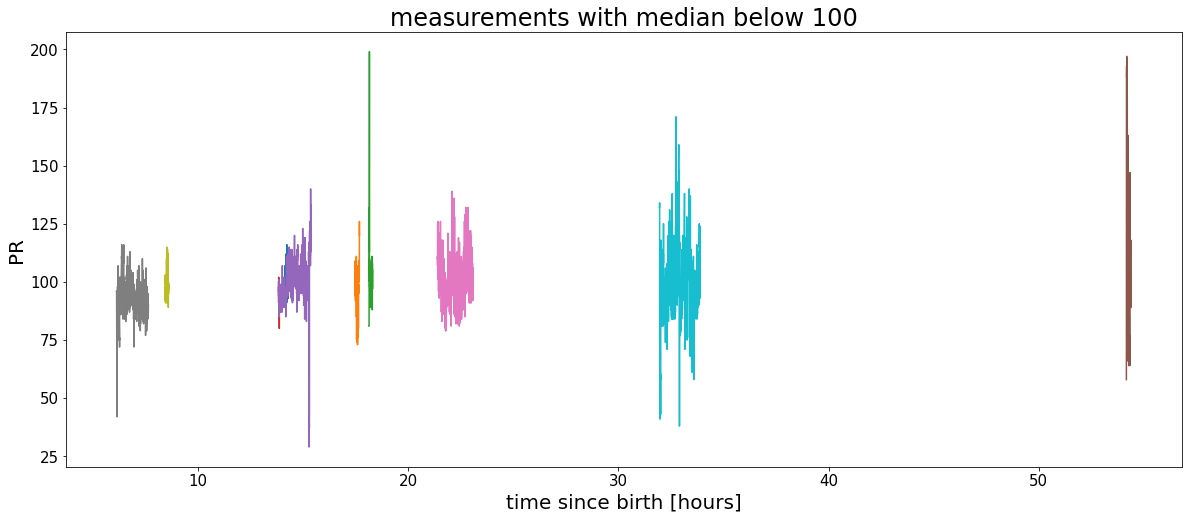

In [20]:
plt.figure(figsize=(20,8))
for i in range(len(names100)):
    b = baby(names100[i])
    sel = np.where(b.measurements[fl_idx_100[i]]['PR']>10.)
    plt.plot(np.array(b.measurements_dt[fl_idx_100[i]])[sel]/60./60.,np.array(b.measurements[fl_idx_100[i]]['PR'])[sel])

plt.title('measurements with median below 100')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.show()

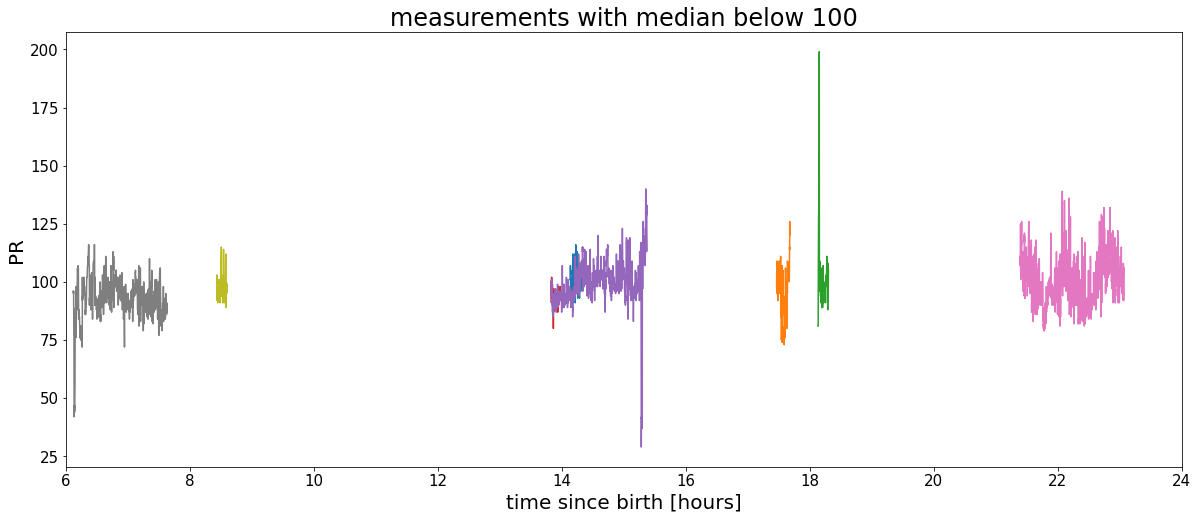

In [21]:
# same but zoom in
plt.figure(figsize=(20,8))
for i in range(len(names100)):
    b = baby(names100[i])
    sel = np.where(b.measurements[fl_idx_100[i]]['PR']>10.)
    plt.plot(np.array(b.measurements_dt[fl_idx_100[i]])[sel]/60./60.,np.array(b.measurements[fl_idx_100[i]]['PR'])[sel])

plt.title('measurements with median below 100')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.xlim(6,24)
plt.show()

## babies above 160

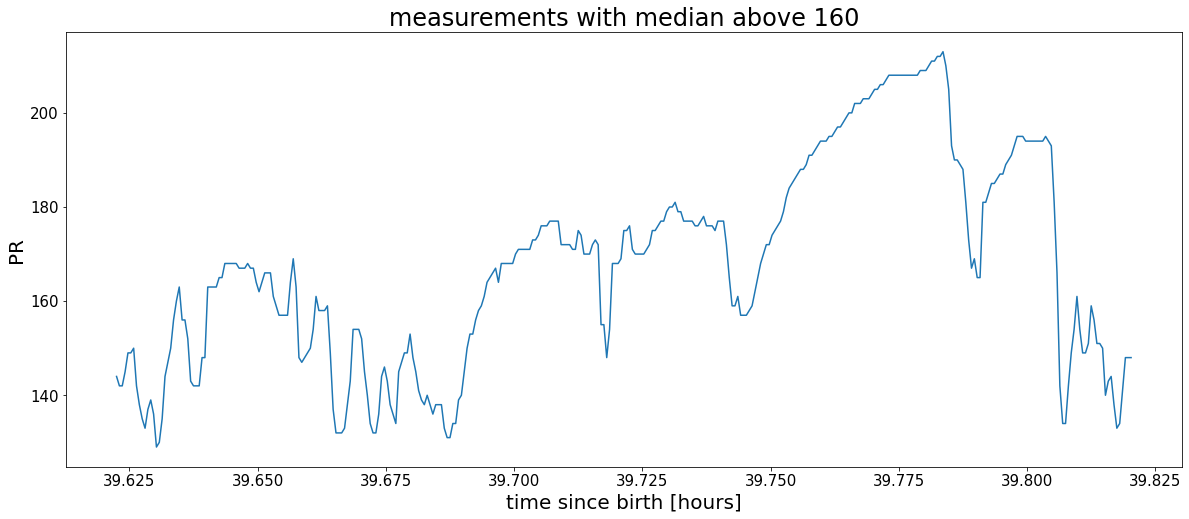

In [22]:
plt.figure(figsize=(20,8))
#for i in range(len(names160)):
for i in range(1):
    i =i+2
    b = baby(names160[i])
    sel = np.where(b.measurements[fl_idx_160[i]]['PR']>10.)
    plt.plot(np.array(b.measurements_dt[fl_idx_160[i]])[sel]/60./60.,np.array(b.measurements[fl_idx_160[i]]['PR'])[sel])

plt.title('measurements with median above 160')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.show()

# plotting all the datapoints

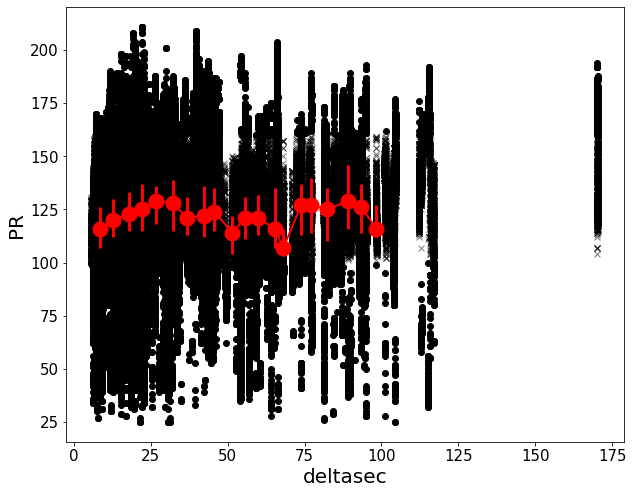

In [20]:
plt.figure(figsize=(10,8))
#plt.plot(delta_hours,pr,".",alpha=0.7)

plt.plot(delta_hours[(pr<160)&(pr>100)],pr[(pr<160)&(pr>100)],"xk",label='100<PR<160',alpha=0.5)
plt.plot(delta_hours[(pr>=160)|(pr<=100)],pr[(pr>=160)|(pr<=100)],"ok",label='PR<100\nPR>160')


xx,yy,ey1,ey2 = median_in_bins_err(delta_hours,pr,6.0,100,20)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='red',label ='median',zorder=11)
plt.plot(xx,yy,color="red",lw=2)

#plt.ylim(95,130)
plt.xlabel('deltasec')

plt.ylabel('PR')
plt.show()

Total number of measurements: 913987
Measurements with 100 < PR < 160: 841325 (92 %)
Measurenment with PR <= 100: 54730 (6 %)
Measurenment with PR >= 160: 17932 (2 %)


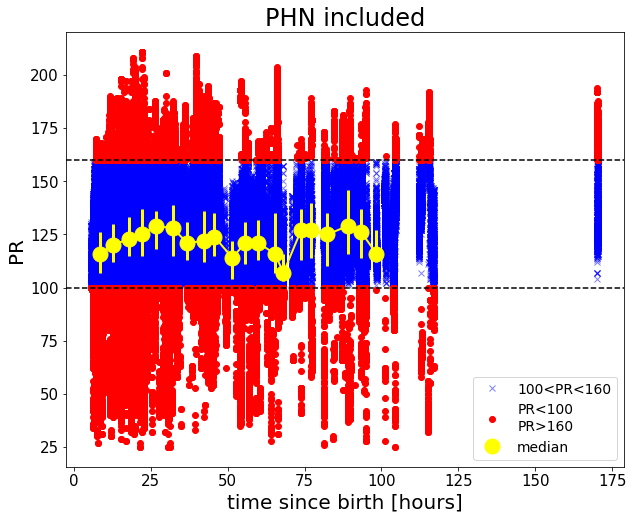

In [21]:
plt.figure(figsize=(10,8))
#plt.plot(delta_hours,pr,".",alpha=0.7)

plt.plot(delta_hours[(pr<160)&(pr>100)],pr[(pr<160)&(pr>100)],"xb",label='100<PR<160',alpha=0.5)
plt.plot(delta_hours[(pr>=160)|(pr<=100)],pr[(pr>=160)|(pr<=100)],"or",label='PR<100\nPR>160')

print('Total number of measurements: %i'%len(pr))
print('Measurements with 100 < PR < 160: %i (%.0f %%)'%(len(pr[(pr<160)&(pr>100)]),len(pr[(pr<160)&(pr>100)])/len(pr)*100))
print('Measurenment with PR <= 100: %i (%.0f %%)'%(len(pr[pr<=100]),len(pr[pr<=100])/len(pr)*100))
print('Measurenment with PR >= 160: %i (%.0f %%)'%(len(pr[pr>=160]),len(pr[pr>=160])/len(pr)*100))


xx,yy,ey1,ey2 = median_in_bins_err(delta_hours,pr,6.0,100,20)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='yellow',label ='median',zorder=11)
plt.plot(xx,yy,color="yellow",lw=2)

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')

#plt.ylim(95,130)
plt.xlabel('time since birth [hours]')

plt.title('PHN included')
plt.legend(fontsize='x-small')
plt.ylabel('PR')
plt.show()

# Read NO PHN

In [22]:
# NO PHN datapoints
NP_pr, NP_spo2, NP_pi, NP_med_pr, NP_med_spo2, NP_med_pi, NP_deltasec = np.loadtxt('../TOST_data/total_datapoints_deltasec_pi_NOPHN.txt',unpack=True)

NP_delta_hours = NP_deltasec/60./60.

#good_val = np.where(((PR_TOT>10.)&(SPO2_TOT>10)&(PI_TOT>0.000001)&(PI_TOT<100)))
sel = np.where(((NP_pr>10.)&(NP_spo2>10)))

NP_pr           = np.array(NP_pr[sel])
NP_spo2         = np.array(NP_spo2[sel])
NP_pi           = np.array(NP_pi[sel])
NP_med_pr       = np.array(NP_med_pr[sel])
NP_med_spo2     = np.array(NP_med_spo2[sel])
NP_med_pi       = np.array(NP_med_pi[sel])
NP_deltasec     = np.array(NP_deltasec[sel])
NP_delta_hours  = np.array(NP_delta_hours[sel])

Total number of measurements: 794290
Measurements with 100 < PR < 160: 736691 (93 %)
Measurenment with PR <= 100: 43787 (6 %)
Measurenment with PR >= 160: 13812 (2 %)


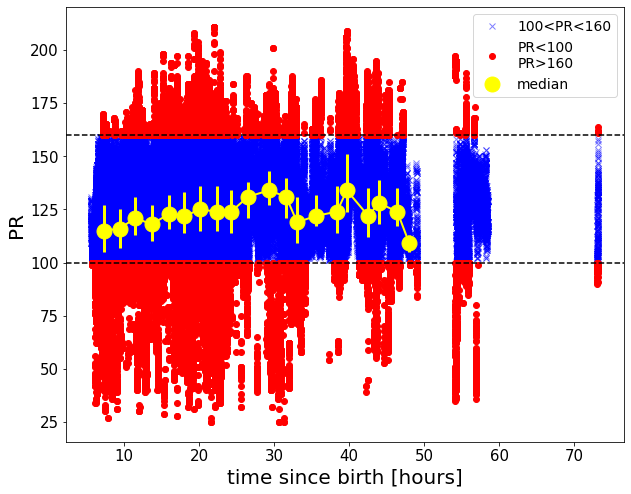

In [23]:
plt.figure(figsize=(10,8))
#plt.plot(delta_hours,pr,".",alpha=0.7)

plt.plot(NP_delta_hours[(NP_pr<160)&(NP_pr>100)],NP_pr[(NP_pr<160)&(NP_pr>100)],"xb",label='100<PR<160',alpha=0.5)
plt.plot(NP_delta_hours[(NP_pr>=160)|(NP_pr<=100)],NP_pr[(NP_pr>=160)|(NP_pr<=100)],"or",label='PR<100\nPR>160')

print('Total number of measurements: %i'%len(NP_pr))
print('Measurements with 100 < PR < 160: %i (%.0f %%)'%(len(NP_pr[(NP_pr<160)&(NP_pr>100)]),len(NP_pr[(NP_pr<160)&(NP_pr>100)])/len(NP_pr)*100))
print('Measurenment with PR <= 100: %i (%.0f %%)'%(len(NP_pr[NP_pr<=100]),len(NP_pr[NP_pr<=100])/len(NP_pr)*100))
print('Measurenment with PR >= 160: %i (%.0f %%)'%(len(NP_pr[NP_pr>=160]),len(NP_pr[NP_pr>=160])/len(NP_pr)*100))


xx,yy,ey1,ey2 = median_in_bins_err(NP_delta_hours,NP_pr,6.0,50,20)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='yellow',label ='median',zorder=11)
plt.plot(xx,yy,color="yellow",lw=2)

plt.axhline(100,ls='dashed',color='k')
plt.axhline(160,ls='dashed',color='k')

#plt.ylim(95,130)
plt.xlabel('time since birth [hours]')

#plt.title('NO PHN')
plt.legend(fontsize='x-small')
plt.ylabel('PR')
plt.show()

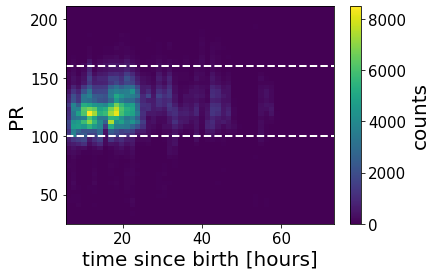

In [24]:
plt.hist2d(NP_delta_hours,NP_pr,bins=50)
plt.colorbar(label='counts')
plt.axhline(100,ls='dashed',lw=2,color='w')
plt.axhline(160,ls='dashed',lw=2,color='w')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.show()

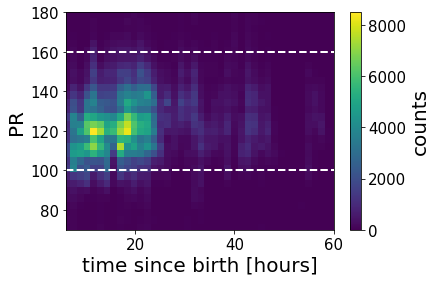

In [25]:
plt.hist2d(NP_delta_hours,NP_pr,bins=50)
plt.colorbar(label='counts')
plt.axhline(100,ls='dashed',lw=2,color='w')
plt.axhline(160,ls='dashed',lw=2,color='w')
plt.xlabel('time since birth [hours]')
plt.ylabel('PR')
plt.xlim(6,60)
plt.ylim(70,180)
plt.show()

In [12]:
plc044 = baby('PLC044')

In [13]:
plc044.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 044/G_PLC 044_Rt Leg_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 044/G_PLC 044_Rt Wrist_Day1.csv']

G_PLC 044_Rt Leg_Day1.csv


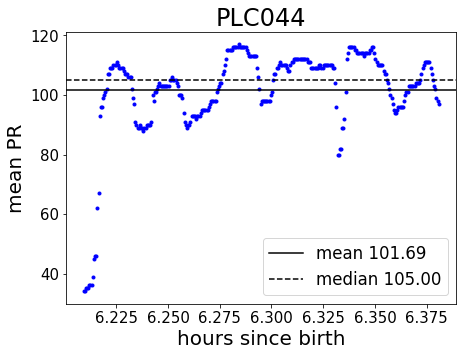

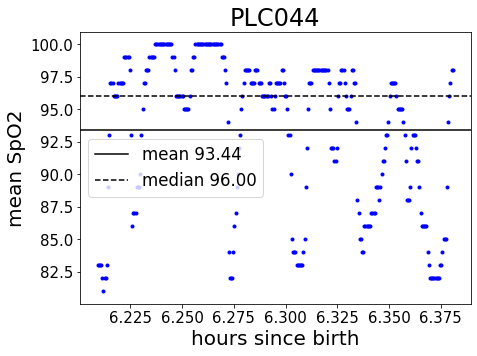

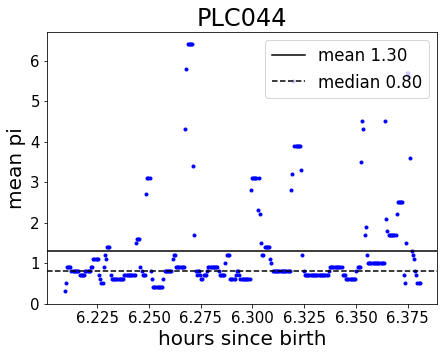

In [14]:
plc044.plot_baby_measurements(0)

G_PLC 044_Rt Wrist_Day1.csv


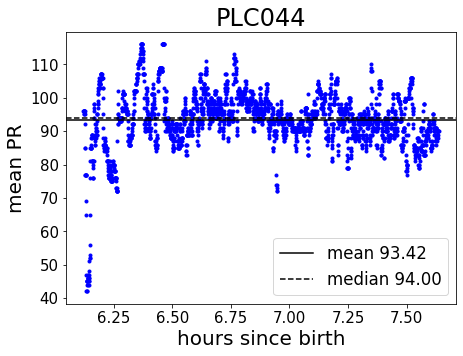

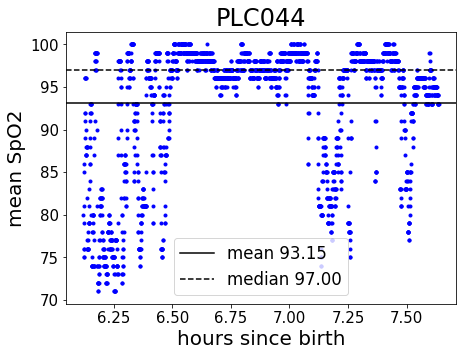

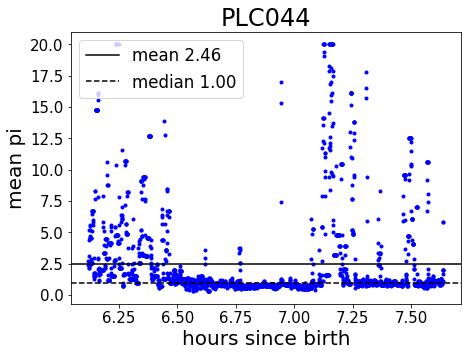

In [15]:
plc044.plot_baby_measurements(1)

In [16]:
plc044.measurements_delta_sec_since_birth

[22353, 22033]

# Plot with histogram on the axes

width of bins = 4.400
width of bins = 4.400
median = 122.0
IQR = [113.0,133.0]


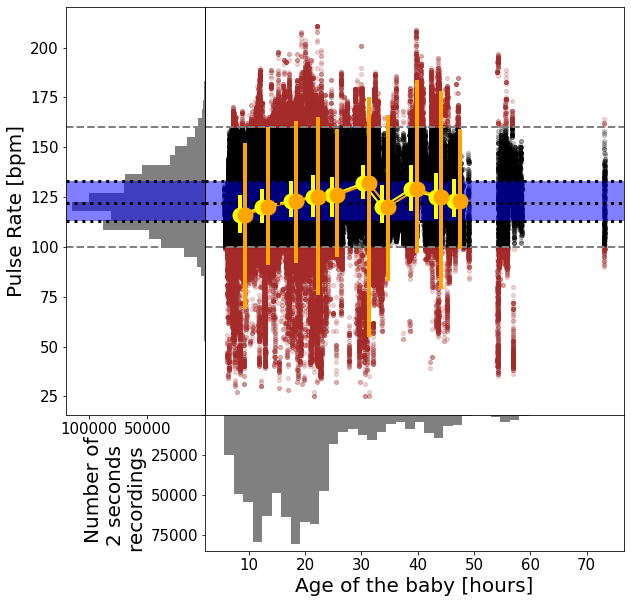

In [71]:
# Create some normally distributed data
#mean = [0, 0]
#cov = [[1, 1], [1, 2]]
#x, y = np.random.multivariate_normal(mean, cov, 3000).T

# ALL DATA POINTS (NO PHN)
x = NP_delta_hours
y = NP_pr

# ONLY MEDIANS (NO PHN)
#x = T['DELTA_SEC_MEASURE'][T['PHN']==False]/60./60.
#y = T['MED_PR'][T['PHN']==False]


# Set up the axes with gridspec
fig = plt.figure(figsize=(10, 10))

#fig.show()
fig.canvas.draw()

grid = plt.GridSpec(4, 4, hspace=0., wspace=0.)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], sharey=main_ax) # xticklabels=[]
y_hist.axhline(100,ls='dashed',lw=2,c='gray')
y_hist.axhline(160,ls='dashed',lw=2,c='gray')
x_hist = fig.add_subplot(grid[-1, 1:],  sharex=main_ax) # yticklabels=[],

# scatter points on the main axes
inside  = (y>=100)&(y<=160)
outside = (y<100)|(y>160)
main_ax.plot(x[inside], y[inside], 'ok', markersize=4, alpha=0.2,zorder=-1)
main_ax.plot(x[outside], y[outside], 'o', color='brown', markersize=4, alpha=0.2,zorder=-1)
main_ax.axhline(100,ls='dashed',lw=2,c='gray')
main_ax.axhline(160,ls='dashed',lw=2,c='gray')

# ERROR BAR 25th 75th percentiles
xx,yy,ey1,ey2 = median_in_bins_err(x,y,6.0,50,10)
main_ax.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=4,color='yellow',label ='median',zorder=11)
main_ax.plot(xx,yy,color="yellow",lw=2)

# ERROR BAR 1st 99th percentiles
xx,yy,ey1,ey2 = median_in_bins_err(x,y,6.0,50,10,p1=0.01,p2=0.99)
main_ax.errorbar(xx+1,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=4,color='orange',label ='median',zorder=11)
main_ax.plot(xx+1,yy,color="orange",lw=2)

#labels = [tick.get_text() for tick in y_hist.get_xticklabels()]
#y_hist.set_xticklabels(labels[:-1])

#print(labels)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()


main_ax.axhline(np.median(y),color='k',lw=3,ls='dotted')
main_ax.axhline(np.percentile(y,25),color='k',lw=3,ls='dotted')
main_ax.axhline(np.percentile(y,75),color='k',lw=3,ls='dotted')
#main_ax.axhline(np.percentile(y,1),color='k',lw=3,ls='dotted')
#main_ax.axhline(np.percentile(y,99),color='k',lw=3,ls='dotted')
y_hist.axhline(np.median(y),color='k',lw=3,ls='dotted')
y_hist.axhline(np.percentile(y,25),color='k',lw=3,ls='dotted')
y_hist.axhline(np.percentile(y,75),color='k',lw=3,ls='dotted')
#y_hist.axhline(np.percentile(y,1),color='k',lw=3,ls='dotted')
#y_hist.axhline(np.percentile(y,99),color='k',lw=3,ls='dotted')


main_ax.axhspan(np.percentile(y,25), np.percentile(y,75), facecolor='blue', alpha=0.5)
y_hist.axhspan(np.percentile(y,25), np.percentile(y,75), facecolor='blue', alpha=0.5)
#main_ax.axhspan(np.percentile(y,1), np.percentile(y,99), facecolor='red', alpha=0.5)
#y_hist.axhspan(np.percentile(y,1), np.percentile(y,99), facecolor='red', alpha=0.5)


print('median = %.1f'%np.median(y))
print("IQR = [%.1f,%.1f]"%(np.percentile(y,25),np.percentile(y,75)))

#y_hist.xaxis.set_major_locator(plt.MultipleLocator(50010))
#y_hist.xaxis.set_minor_locator(plt.MultipleLocator(50010))

y_hist.xaxis.get_major_ticks()[0].label1.set_visible(False)
x_hist.yaxis.get_major_ticks()[0].label1.set_visible(False)


x_hist.set_xlabel('Age of the baby [hours]')
#x_hist.set_ylabel('Number    \nof     \nrecordings     ',rotation=90)
x_hist.set_ylabel('Number of  \n2 seconds    \nrecordings     ',rotation=90)

y_hist.set_ylabel('Pulse Rate [bpm]')

#plt.savefig('../plots/020/PR_age_plothisto.jpeg')
#plt.savefig('../plots/020/PR_age_plothisto_medians.jpeg')

#fig.canvas.draw()
plt.show()

width of bins = 7.800
width of bins = 7.800
median = 122.0
IQR = [114.0,130.0]


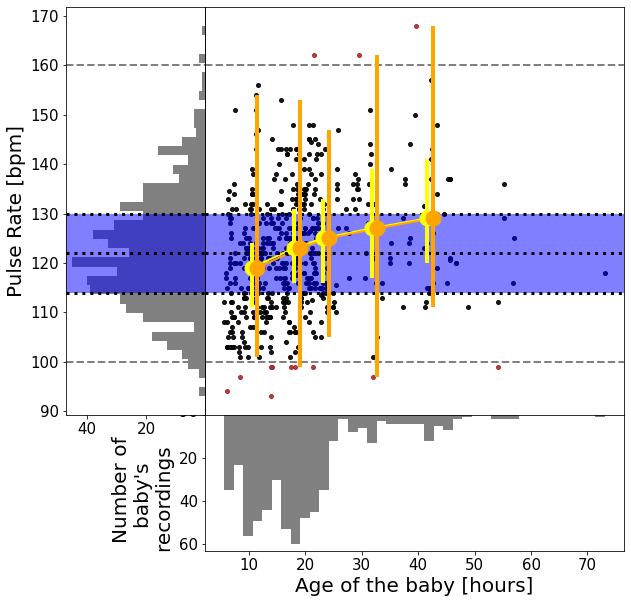

In [73]:
# ALL DATA POINTS (NO PHN)
#x = NP_delta_hours
#y = NP_pr

# ONLY MEDIANS (NO PHN)
x = T['DELTA_SEC_MEASURE'][T['PHN']==False]/60./60.
y = T['MED_PR'][T['PHN']==False]


# Set up the axes with gridspec
fig = plt.figure(figsize=(10, 10))

#fig.show()
fig.canvas.draw()

grid = plt.GridSpec(4, 4, hspace=0., wspace=0.)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], sharey=main_ax) # xticklabels=[]
y_hist.axhline(100,ls='dashed',lw=2,c='gray')
y_hist.axhline(160,ls='dashed',lw=2,c='gray')
x_hist = fig.add_subplot(grid[-1, 1:],  sharex=main_ax) # yticklabels=[],



# scatter points on the main axes
inside  = (y>=100)&(y<=160)
outside = (y<100)|(y>160)
main_ax.plot(x[inside], y[inside], 'ok', markersize=4, alpha=0.9,zorder=-1)
main_ax.plot(x[outside], y[outside], 'o', color='brown', markersize=4, alpha=0.9,zorder=-1)
main_ax.axhline(100,ls='dashed',lw=2,c='gray')
main_ax.axhline(160,ls='dashed',lw=2,c='gray')


# ERROR BAR 25th 75th percentiles
xx,yy,ey1,ey2 = median_in_bins_err(x,y,6.0,45,5)
main_ax.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=4,color='yellow',label ='median',zorder=11)
main_ax.plot(xx,yy,color="yellow",lw=2)

# ERROR BAR 1st 99th percentiles
xx,yy,ey1,ey2 = median_in_bins_err(x,y,6.0,45,5,p1=0.01,p2=0.99)
main_ax.errorbar(xx+1,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=4,color='orange',label ='median',zorder=11)
main_ax.plot(xx+1,yy,color="orange",lw=2)



#labels = [tick.get_text() for tick in y_hist.get_xticklabels()]
#y_hist.set_xticklabels(labels[:-1])

#print(labels)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

# dotted lines
main_ax.axhline(np.median(y),color='k',lw=3,ls='dotted')
main_ax.axhline(np.percentile(y,25),color='k',lw=3,ls='dotted')
main_ax.axhline(np.percentile(y,75),color='k',lw=3,ls='dotted')
y_hist.axhline(np.median(y),color='k',lw=3,ls='dotted')
y_hist.axhline(np.percentile(y,25),color='k',lw=3,ls='dotted')
y_hist.axhline(np.percentile(y,75),color='k',lw=3,ls='dotted')

# 25th-75th percentiles shaded ares
main_ax.axhspan(np.percentile(y,25), np.percentile(y,75), facecolor='blue', alpha=0.5)
y_hist.axhspan(np.percentile(y,25), np.percentile(y,75), facecolor='blue', alpha=0.5)


print('median = %.1f'%np.median(y))
print("IQR = [%.1f,%.1f]"%(np.percentile(y,25),np.percentile(y,75)))


#y_hist.xaxis.set_major_locator(plt.MultipleLocator(50010))
#y_hist.xaxis.set_minor_locator(plt.MultipleLocator(50010))

y_hist.xaxis.get_major_ticks()[0].label1.set_visible(False)
x_hist.yaxis.get_major_ticks()[0].label1.set_visible(False)


x_hist.set_xlabel('Age of the baby [hours]')
y_hist.set_ylabel('Pulse Rate [bpm]')
#x_hist.set_ylabel('Number    \nof     \nrecordings     ',rotation=90)
x_hist.set_ylabel('Number of  \nbaby\'s    \nrecordings     ',rotation=90)



#plt.savefig('../plots/020/PR_age_plothisto.jpeg')
#plt.savefig('../plots/020/PR_age_plothisto_medians.jpeg')

#plt.savefig('../plots/020/PR_age_plothisto_onlymed.jpeg')

#fig.canvas.draw()
plt.show()

# Multiple measurements for the same baby with low PR

In [92]:
names100

array(['FMC013', 'FMC030', 'RGH010', 'FMC072', 'FMC072', 'PLC 028',
       'FMC133', 'PLC044', 'PLC 049', 'PLC 049'], dtype=object)

In [93]:
FMC013 = baby('FMC013')

In [202]:
FMC013.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 013/G_FMC013_Day1_Lt foot.csv']

In [207]:
(FMC013.measurements_dt[0][0]-FMC013.measurements_dt[0][-1])/60.

-11.266666666666667

G_FMC013_Day1_Lt foot.csv


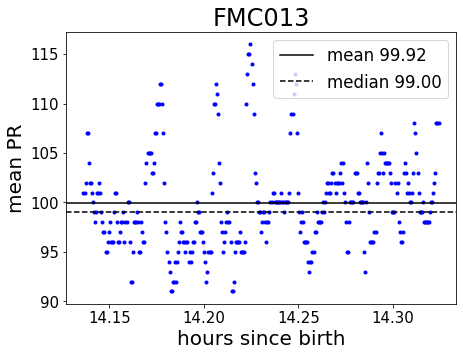

In [100]:
FMC013.plot_baby_measurements(0,only_PR=True)

In [97]:
FMC030 = baby('FMC030')

In [208]:
(FMC030.measurements_dt[0][0]-FMC030.measurements_dt[0][-1])/60.

-12.8

In [203]:
FMC030.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 030/G_FMC030_Day1_Rt Foot.csv']

G_FMC030_Day1_Rt Foot.csv


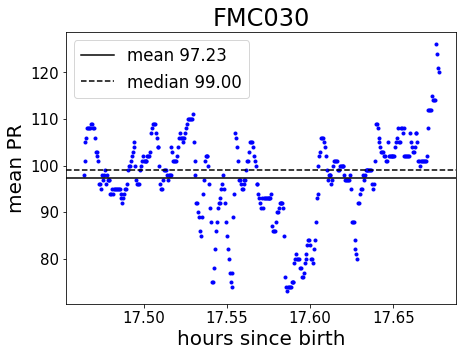

In [101]:
FMC030.plot_baby_measurements(0,only_PR=True)

In [102]:
RGH010 = baby('RGH010')

G_RGH010_Day1_Lt foot.csv


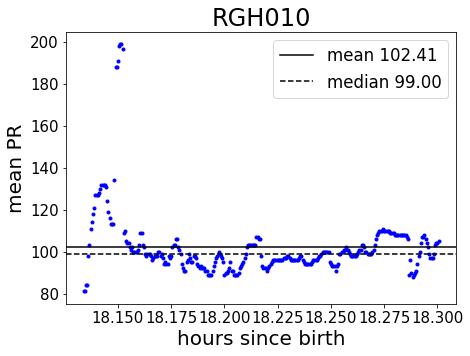

In [104]:
RGH010.plot_baby_measurements(0,only_PR=True)

In [209]:
(RGH010.measurements_dt[0][0]-RGH010.measurements_dt[0][-1])/60.

-10.0

G_RGH010_Day1_Rt Wrist.csv


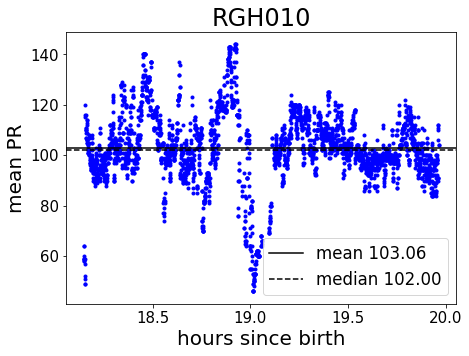

In [105]:
RGH010.plot_baby_measurements(1,only_PR=True)

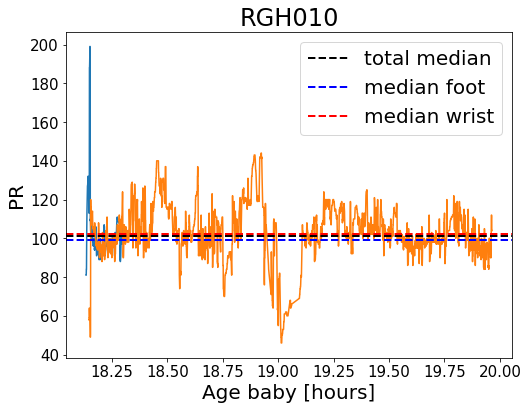

In [137]:
x1 = np.array(RGH010.measurements_dt[0]/60./60.)
y1 = np.array(RGH010.measurements[0]['PR'])
x2 = np.array(RGH010.measurements_dt[1]/60./60.)
y2 = np.array(RGH010.measurements[1]['PR'])
sel1 = np.where(y1>10)
sel2 = np.where(y2>10)

plt.figure(figsize=(8,6))
plt.plot(x1[sel1],y1[sel1])
plt.plot(x2[sel2],y2[sel2])

y_tot= np.concatenate((y1,y2),axis=None)

plt.axhline(np.median(y_tot),c='k',ls='dashed',lw=2,label='total median')
plt.axhline(np.median(y1),c='b',ls='dashed',lw=2,label='median foot')
plt.axhline(np.median(y2),c='r',ls='dashed',lw=2,label='median wrist')

plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('RGH010')

plt.legend()
plt.show()

In [117]:
RGH010.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST RGH Data Groomed/G_RGH 010/G_RGH010_Day1_Lt foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST RGH Data Groomed/G_RGH 010/G_RGH010_Day1_Rt Wrist.csv']

In [134]:
FMC072 = baby('FMC072')

In [135]:
FMC072.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC 072/G_FMC072_Day1_Rt Wrist.csv']

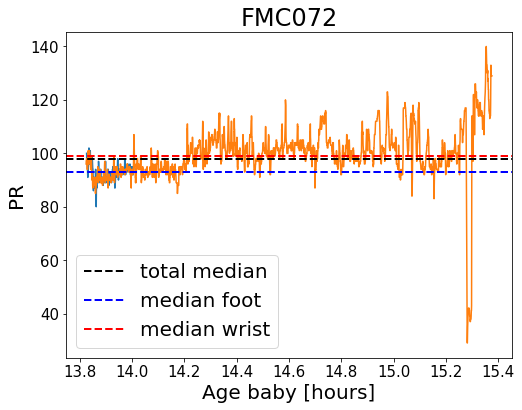

In [138]:
x1 = np.array(FMC072.measurements_dt[0]/60./60.)
y1 = np.array(FMC072.measurements[0]['PR'])
x2 = np.array(FMC072.measurements_dt[1]/60./60.)
y2 = np.array(FMC072.measurements[1]['PR'])
sel1 = np.where(y1>10)
sel2 = np.where(y2>10)

plt.figure(figsize=(8,6))
plt.plot(x1[sel1],y1[sel1])
plt.plot(x2[sel2],y2[sel2])

y_tot= np.concatenate((y1,y2),axis=None)

plt.axhline(np.median(y_tot),c='k',ls='dashed',lw=2,label='total median')
plt.axhline(np.median(y1),c='b',ls='dashed',lw=2,label='median foot')
plt.axhline(np.median(y2),c='r',ls='dashed',lw=2,label='median wrist')

plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('FMC072')

plt.legend()
plt.show()

In [139]:
PLC028 = baby('PLC028')

In [140]:
PLC028.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day1_Rt Wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day2_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC028/G_PLC028_Day2_Rt Wrist.csv']

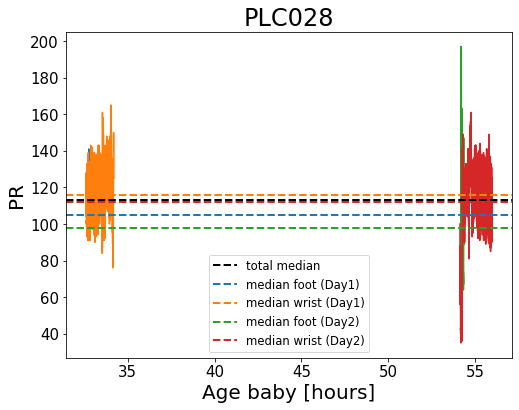

In [155]:
x1 = np.array(PLC028.measurements_dt[0]/60./60.)
y1 = np.array(PLC028.measurements[0]['PR'])
x2 = np.array(PLC028.measurements_dt[1]/60./60.)
y2 = np.array(PLC028.measurements[1]['PR'])
x3 = np.array(PLC028.measurements_dt[2]/60./60.)
y3 = np.array(PLC028.measurements[2]['PR'])
x4 = np.array(PLC028.measurements_dt[3]/60./60.)
y4 = np.array(PLC028.measurements[3]['PR'])


sel1 = np.where(y1>10)
sel2 = np.where(y2>10)
sel3 = np.where(y3>10)
sel4 = np.where(y4>10)

plt.figure(figsize=(8,6))
plt.plot(x1[sel1],y1[sel1])
plt.plot(x2[sel2],y2[sel2])
plt.plot(x3[sel3],y3[sel3])
plt.plot(x4[sel4],y4[sel4])

y_tot= np.concatenate((y1,y2,y3,y4),axis=None)
#
plt.axhline(np.median(y_tot),c='k',ls='dashed',lw=2,label='total median')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot (Day1)')
plt.axhline(np.median(y2),c='C1',ls='dashed',lw=2,label='median wrist (Day1)')
plt.axhline(np.median(y3),c='C2',ls='dashed',lw=2,label='median foot (Day2)')
plt.axhline(np.median(y4),c='C3',ls='dashed',lw=2,label='median wrist (Day2)')

plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC028')

plt.legend(fontsize='xx-small')
plt.show()

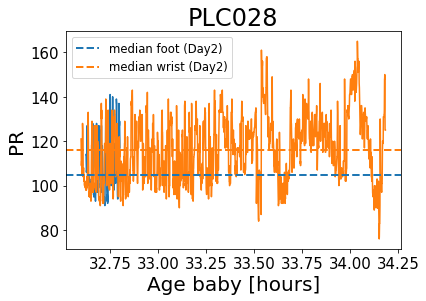

In [161]:
plt.plot(x1[sel1],y1[sel1],color='C0')
plt.plot(x2[sel2],y2[sel2],color='C1')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot (Day2)')
plt.axhline(np.median(y2),c='C1',ls='dashed',lw=2,label='median wrist (Day2)')
plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC028')

plt.legend(fontsize='xx-small')
plt.show()

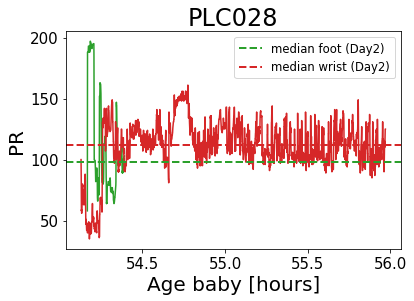

In [160]:
plt.plot(x3[sel3],y3[sel3],color='C2')
plt.plot(x4[sel4],y4[sel4],color='C3')
plt.axhline(np.median(y3),c='C2',ls='dashed',lw=2,label='median foot (Day2)')
plt.axhline(np.median(y4),c='C3',ls='dashed',lw=2,label='median wrist (Day2)')
plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC028')

plt.legend(fontsize='xx-small')
plt.show()

In [163]:
FMC133 = baby('FMC133')

In [164]:
FMC133.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_133/G_FMC133_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_133/G_FMC133_Day1_Rt Wrist.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_133/G_PHN_FMC133_Day3_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_133/G_PHN_FMC133_Day3_Rt Wrist.csv']

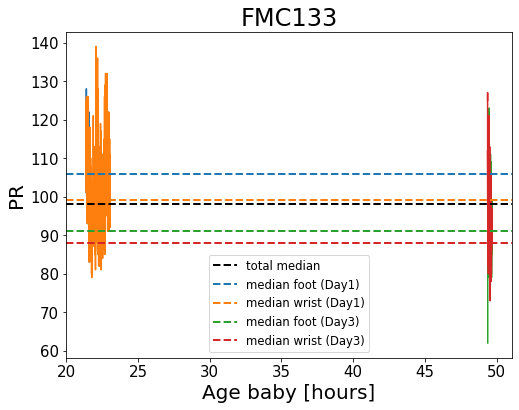

In [180]:
x1 = np.array(FMC133.measurements_dt[0]/60./60.)
y1 = np.array(FMC133.measurements[0]['PR'])
x2 = np.array(FMC133.measurements_dt[1]/60./60.)
y2 = np.array(FMC133.measurements[1]['PR'])
x3 = np.array(FMC133.measurements_dt[2]/60./60.)
y3 = np.array(FMC133.measurements[2]['PR'])
x4 = np.array(FMC133.measurements_dt[3]/60./60.)
y4 = np.array(FMC133.measurements[3]['PR'])


sel1 = np.where(y1>10)
sel2 = np.where(y2>10)
sel3 = np.where(y3>10)
sel4 = np.where(y4>10)

plt.figure(figsize=(8,6))
plt.plot(x1[sel1],y1[sel1])
plt.plot(x2[sel2],y2[sel2])
plt.plot(x3[sel3],y3[sel3])
plt.plot(x4[sel4],y4[sel4])

y_tot= np.concatenate((y1,y2,y3,y4),axis=None)
#
plt.axhline(np.median(y_tot),c='k',ls='dashed',lw=2,label='total median')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot (Day1)')
plt.axhline(np.median(y2),c='C1',ls='dashed',lw=2,label='median wrist (Day1)')
plt.axhline(np.median(y3),c='C2',ls='dashed',lw=2,label='median foot (Day3)')
plt.axhline(np.median(y4),c='C3',ls='dashed',lw=2,label='median wrist (Day3)')

plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('FMC133')

plt.legend(fontsize='xx-small')
plt.show()

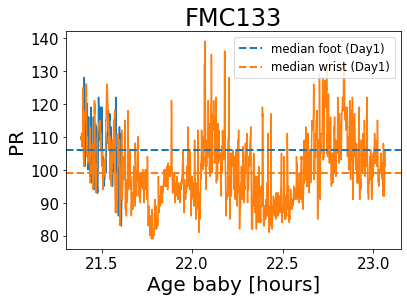

In [181]:
plt.plot(x1[sel1],y1[sel1],color='C0')
plt.plot(x2[sel2],y2[sel2],color='C1')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot (Day1)')
plt.axhline(np.median(y2),c='C1',ls='dashed',lw=2,label='median wrist (Day1)')
plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('FMC133')

plt.legend(fontsize='xx-small')
plt.show()

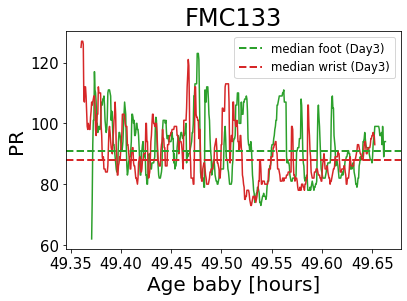

In [182]:
plt.plot(x3[sel3],y3[sel3],color='C2')
plt.plot(x4[sel4],y4[sel4],color='C3')
plt.axhline(np.median(y3),c='C2',ls='dashed',lw=2,label='median foot (Day3)')
plt.axhline(np.median(y4),c='C3',ls='dashed',lw=2,label='median wrist (Day3)')
plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('FMC133')

plt.legend(fontsize='xx-small')
plt.show()

In [169]:
names100

array(['FMC013', 'FMC030', 'RGH010', 'FMC072', 'FMC072', 'PLC 028',
       'FMC133', 'PLC044', 'PLC 049', 'PLC 049'], dtype=object)

In [170]:
PLC044 = baby('PLC044')

In [171]:
PLC044.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 044/G_PLC 044_Rt Leg_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 044/G_PLC 044_Rt Wrist_Day1.csv']

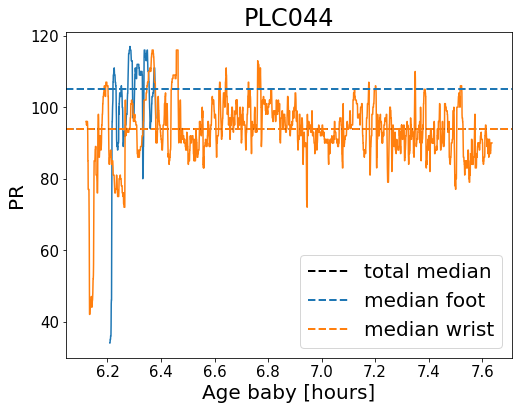

In [173]:
x1 = np.array(PLC044.measurements_dt[0]/60./60.)
y1 = np.array(PLC044.measurements[0]['PR'])
x2 = np.array(PLC044.measurements_dt[1]/60./60.)
y2 = np.array(PLC044.measurements[1]['PR'])
sel1 = np.where(y1>10)
sel2 = np.where(y2>10)

plt.figure(figsize=(8,6))
plt.plot(x1[sel1],y1[sel1])
plt.plot(x2[sel2],y2[sel2])

y_tot= np.concatenate((y1,y2),axis=None)

plt.axhline(np.median(y_tot),c='k',ls='dashed',lw=2,label='total median')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot')
plt.axhline(np.median(y2),c='C1',ls='dashed',lw=2,label='median wrist')

plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC044')

plt.legend()
plt.show()

In [174]:
PLC049 = baby('PLC049')

In [175]:
PLC049.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 049/G_PLC 049_Rt Leg_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 049/G_PLC 049_Rt Leg_Day2.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 049/G_PLC 049_Rt Wrist_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 049/G_PLC 049_Rt Wrist_Day2.csv']

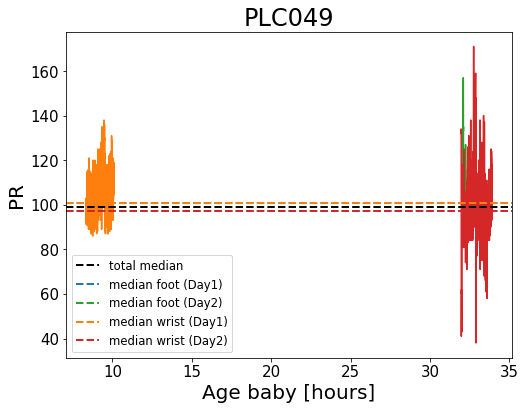

In [183]:
x1 = np.array(PLC049.measurements_dt[0]/60./60.)
y1 = np.array(PLC049.measurements[0]['PR'])
x2 = np.array(PLC049.measurements_dt[1]/60./60.)
y2 = np.array(PLC049.measurements[1]['PR'])
x3 = np.array(PLC049.measurements_dt[2]/60./60.)
y3 = np.array(PLC049.measurements[2]['PR'])
x4 = np.array(PLC049.measurements_dt[3]/60./60.)
y4 = np.array(PLC049.measurements[3]['PR'])


sel1 = np.where(y1>10)
sel2 = np.where(y2>10)
sel3 = np.where(y3>10)
sel4 = np.where(y4>10)

plt.figure(figsize=(8,6))
plt.plot(x1[sel1],y1[sel1],color='C0')
plt.plot(x2[sel2],y2[sel2],color='C2')
plt.plot(x3[sel3],y3[sel3],color='C1')
plt.plot(x4[sel4],y4[sel4],color='C3')

y_tot= np.concatenate((y1,y2,y3,y4),axis=None)
#
plt.axhline(np.median(y_tot),c='k',ls='dashed',lw=2,label='total median')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot (Day1)')
plt.axhline(np.median(y2),c='C2',ls='dashed',lw=2,label='median foot (Day2)')
plt.axhline(np.median(y3),c='C1',ls='dashed',lw=2,label='median wrist (Day1)')
plt.axhline(np.median(y4),c='C3',ls='dashed',lw=2,label='median wrist (Day2)')

plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC049')

plt.legend(fontsize='xx-small')
plt.show()

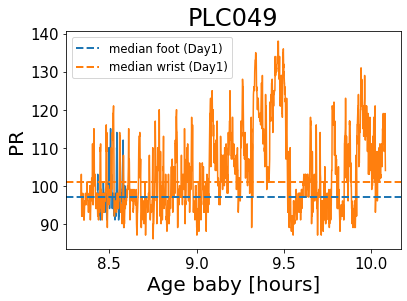

In [185]:
plt.plot(x1[sel1],y1[sel1],color='C0')
plt.plot(x3[sel3],y3[sel3],color='C1')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot (Day1)')
plt.axhline(np.median(y3),c='C1',ls='dashed',lw=2,label='median wrist (Day1)')
plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC049')

plt.legend(fontsize='xx-small')
plt.show()

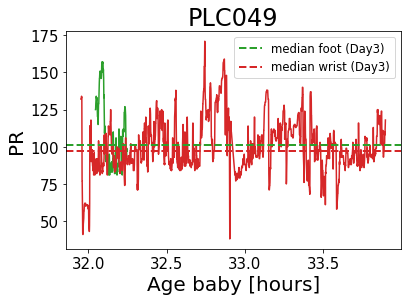

In [186]:
plt.plot(x2[sel2],y2[sel2],color='C2')
plt.plot(x4[sel4],y4[sel4],color='C3')
plt.axhline(np.median(y2),c='C2',ls='dashed',lw=2,label='median foot (Day3)')
plt.axhline(np.median(y4),c='C3',ls='dashed',lw=2,label='median wrist (Day3)')
plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC049')

plt.legend(fontsize='xx-small')
plt.show()

In [187]:
names160

array(['PLC025', 'PLC 035', 'PLC058'], dtype=object)

In [188]:
PLC025 = baby('PLC025')

In [189]:
PLC025.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC025/G_PLC025_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC025/G_PLC025_Day1_Rt Wrist.csv']

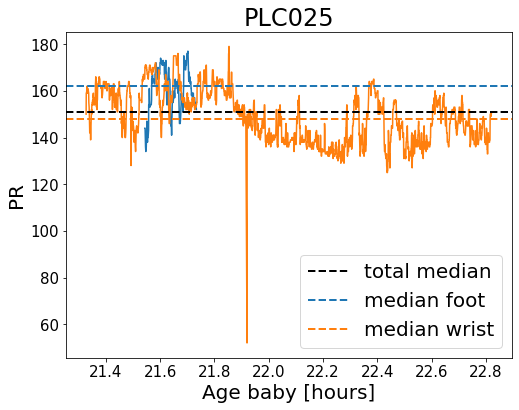

In [191]:
x1 = np.array(PLC025.measurements_dt[0]/60./60.)
y1 = np.array(PLC025.measurements[0]['PR'])
x2 = np.array(PLC025.measurements_dt[1]/60./60.)
y2 = np.array(PLC025.measurements[1]['PR'])
sel1 = np.where(y1>10)
sel2 = np.where(y2>10)

plt.figure(figsize=(8,6))
plt.plot(x1[sel1],y1[sel1])
plt.plot(x2[sel2],y2[sel2])

y_tot= np.concatenate((y1,y2),axis=None)

plt.axhline(np.median(y_tot),c='k',ls='dashed',lw=2,label='total median')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot')
plt.axhline(np.median(y2),c='C1',ls='dashed',lw=2,label='median wrist')

plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC025')

plt.legend()
plt.show()

In [192]:
PLC035 = baby('PLC035')

In [193]:
PLC035.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC035/G_PLC035_Day1_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC035/G_PLC035_Day1_Rt Wrist.csv']

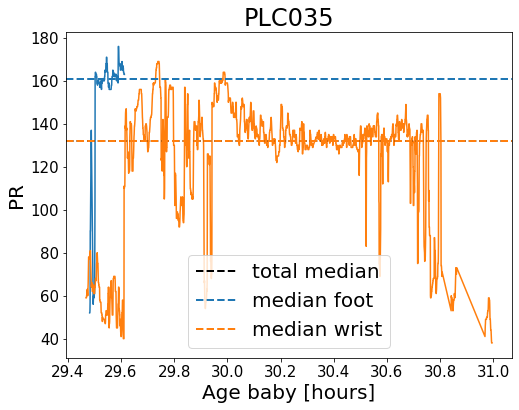

In [194]:
x1 = np.array(PLC035.measurements_dt[0]/60./60.)
y1 = np.array(PLC035.measurements[0]['PR'])
x2 = np.array(PLC035.measurements_dt[1]/60./60.)
y2 = np.array(PLC035.measurements[1]['PR'])
sel1 = np.where(y1>10)
sel2 = np.where(y2>10)

plt.figure(figsize=(8,6))
plt.plot(x1[sel1],y1[sel1])
plt.plot(x2[sel2],y2[sel2])

y_tot= np.concatenate((y1,y2),axis=None)

plt.axhline(np.median(y_tot),c='k',ls='dashed',lw=2,label='total median')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot')
plt.axhline(np.median(y2),c='C1',ls='dashed',lw=2,label='median wrist')

plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC035')

plt.legend()
plt.show()

In [195]:
PLC058 = baby('PLC058')

In [196]:
PLC058.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Leg_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Leg_Day2.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt Wrist_Day1.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST PLC Data Groomed/G_PLC 058/G_PLC 058_Rt wrist_Day2.csv']

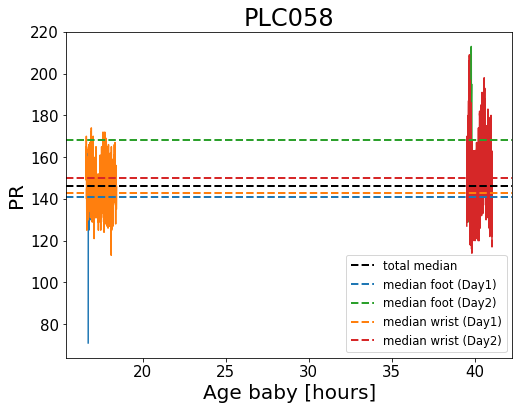

In [197]:
x1 = np.array(PLC058.measurements_dt[0]/60./60.)
y1 = np.array(PLC058.measurements[0]['PR'])
x2 = np.array(PLC058.measurements_dt[1]/60./60.)
y2 = np.array(PLC058.measurements[1]['PR'])
x3 = np.array(PLC058.measurements_dt[2]/60./60.)
y3 = np.array(PLC058.measurements[2]['PR'])
x4 = np.array(PLC058.measurements_dt[3]/60./60.)
y4 = np.array(PLC058.measurements[3]['PR'])


sel1 = np.where(y1>10)
sel2 = np.where(y2>10)
sel3 = np.where(y3>10)
sel4 = np.where(y4>10)

plt.figure(figsize=(8,6))
plt.plot(x1[sel1],y1[sel1],color='C0')
plt.plot(x2[sel2],y2[sel2],color='C2')
plt.plot(x3[sel3],y3[sel3],color='C1')
plt.plot(x4[sel4],y4[sel4],color='C3')

y_tot= np.concatenate((y1,y2,y3,y4),axis=None)
#
plt.axhline(np.median(y_tot),c='k',ls='dashed',lw=2,label='total median')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot (Day1)')
plt.axhline(np.median(y2),c='C2',ls='dashed',lw=2,label='median foot (Day2)')
plt.axhline(np.median(y3),c='C1',ls='dashed',lw=2,label='median wrist (Day1)')
plt.axhline(np.median(y4),c='C3',ls='dashed',lw=2,label='median wrist (Day2)')

plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC058')

plt.legend(fontsize='xx-small')
plt.show()

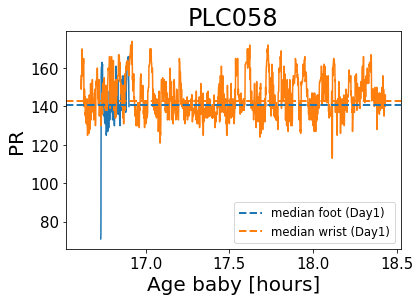

In [199]:
plt.plot(x1[sel1],y1[sel1],color='C0')
plt.plot(x3[sel3],y3[sel3],color='C1')
plt.axhline(np.median(y1),c='C0',ls='dashed',lw=2,label='median foot (Day1)')
plt.axhline(np.median(y3),c='C1',ls='dashed',lw=2,label='median wrist (Day1)')
plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC058')

plt.legend(fontsize='xx-small')
plt.show()

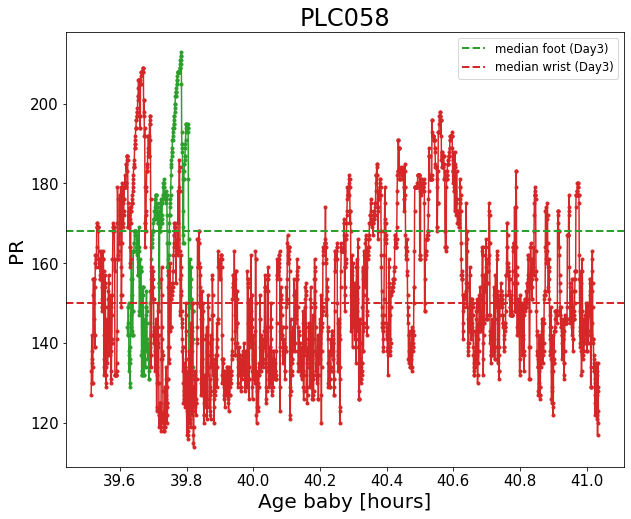

In [233]:
plt.figure(figsize=(10,8))
plt.plot(x2[sel2],y2[sel2],color='C2')
plt.plot(x2[sel2],y2[sel2],".",color='C2')
plt.plot(x4[sel4],y4[sel4],color='C3')
plt.plot(x4[sel4],y4[sel4],".",color='C3')
plt.axhline(np.median(y2),c='C2',ls='dashed',lw=2,label='median foot (Day3)')
plt.axhline(np.median(y4),c='C3',ls='dashed',lw=2,label='median wrist (Day3)')
plt.ylabel('PR')
plt.xlabel('Age baby [hours]')
plt.title('PLC058')

plt.legend(fontsize='xx-small')
plt.show()